# Experiment 5
## 5 January


# 24MDT0184
## Tufan Kundu

# Softmax Regression

## Q1. Today we will try to implement softmax regression for solving a multiclass classification problem. For that lets create a synthetic dataset using the make classification function that we used in the previous class. Lets assume we have two features X1 and X2 to predict three classes to which they belong to. And try to plot the decision boundaries in that cases.

• First lets try to create a dataset for our purpose


In [41]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
x, y = make_classification(n_classes = 3, n_features = 2, n_redundant = 0, n_clusters_per_class = 1, random_state = 42)

In [42]:
x

array([[ 0.69840909, -1.38029525],
       [-0.00832267, -1.7576143 ],
       [ 1.12991576,  1.10236134],
       [ 1.22831184, -0.75717844],
       [-1.37298251, -1.73833907],
       [-1.36670344, -1.71586731],
       [-0.22550626, -0.18453596],
       [ 0.806865  ,  0.83434332],
       [ 1.03307436, -0.85545993],
       [ 1.48828894,  1.53392072],
       [ 0.58590018, -1.33745666],
       [-0.76688721, -0.55254337],
       [ 0.63356167, -1.17278867],
       [ 0.12437227,  0.19896733],
       [-0.42860597,  0.15025667],
       [ 1.32272135, -0.59340317],
       [-0.08239154, -0.02861137],
       [-0.949498  , -0.92631465],
       [ 1.1589004 ,  1.12625638],
       [ 1.00183089, -1.02646717],
       [ 1.8394635 ,  1.80773058],
       [ 0.55656344, -1.31038476],
       [ 0.76916909, -1.0609667 ],
       [ 0.46010921, -1.48739641],
       [-0.76472142, -0.52767662],
       [ 1.09563437,  1.04903808],
       [-0.75106561, -0.50023377],
       [ 1.88782031, -0.36699364],
       [-0.90934319,

In [43]:
y

array([0, 0, 1, 0, 2, 2, 1, 1, 0, 1, 0, 2, 0, 1, 2, 0, 1, 2, 1, 0, 1, 0,
       0, 0, 2, 1, 2, 0, 2, 2, 0, 2, 1, 1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 2, 2, 0, 2, 1, 0, 1, 0, 1, 2, 1, 1, 0, 0, 0, 2, 0, 2,
       1, 2, 2, 0, 1, 2, 2, 0, 0, 2, 0, 1, 0, 1, 1, 0, 2, 2, 2, 1, 1, 0,
       2, 0, 2, 0, 2, 1, 0, 2, 1, 2, 0, 0])

## Do the train test split of the data with test size 20%

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)

## Next we will create an object of LogisticRegression class as clf. The same class can be used for softmax regression

In [45]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(multi_class='multinomial')

clf.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

### Now we can fit the model

In [46]:
y_pred = clf.predict(x_test)

### Next print the accuracy of your model

In [47]:
from sklearn.metrics import accuracy_score
print(f"The accuracy of the model is:{accuracy_score(y_test,y_pred)*100} %")

The accuracy of the model is:90.0 %


## Further, we can try to plot the decision boundaries in this case.

In [48]:
x_min,x_max = x[:,0].min()-1, x[:,0].max()+1
y_min,y_max = x[:,1].min()-1,x[:,1].max()+1
xx,yy = np.meshgrid(np.linspace(x_min,x_max,500),np.linspace(y_min,y_max,500))


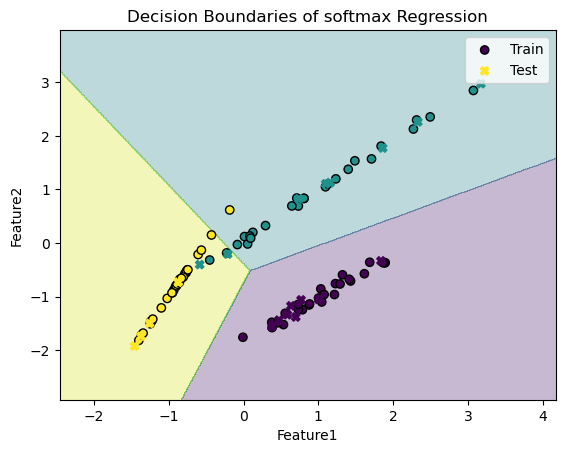

In [49]:
z = clf.predict(np.c_[xx.ravel(),yy.ravel()])

z = z.reshape(xx.shape)

plt.contourf(xx,yy,z,alpha = 0.3)
plt.scatter(x_train[:,0],x_train[:,1],c = y_train,edgecolors='k',label = 'Train')
plt.scatter(x_test[:,0],x_test[:,1],c = y_test,marker='X',label = 'Test')
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.title("Decision Boundaries of softmax Regression")
plt.legend()
plt.show()

## Q2. Next try to implement softmax regression to fit a model in connection with the dataset ”Croprecommendation.csv” available for you to download in moodle.

## Loading the dataset

In [50]:
df = pd.read_csv(r"D:\study material\VIT_Data_Science\Winter_Sem\Data Mining and Machine Learning Lab\Class_notes\ML_exp5\train_set_label.csv")

In [51]:
df

,N,P,K,temperature,humidity,ph,rainfall,crop
0,17.000000,136.000000,196.00000,23.871923,90.499390,5.882156,103.054809,apple
1,49.000000,69.000000,82.00000,18.315615,15.361435,7.263119,81.787105,chickpea
2,74.000000,49.000000,38.00000,23.314104,71.450905,7.488014,164.497037,jute
3,104.000000,35.000000,28.00000,27.510061,50.666872,6.983732,143.995555,coffee
4,23.000000,72.000000,84.00000,19.020613,17.131591,6.920251,79.926981,chickpea
...,...,...,...,...,...,...,...,...
1645,40.000000,17.000000,15.00000,21.350934,90.949297,7.871063,107.086209,orange
1646,40.000000,18.000000,43.00000,19.386038,86.790585,5.767373,109.913098,pomegranate
1647,35.000000,135.000000,199.00000,21.774667,80.549426,6.400720,69.396304,grapes
1648,97.000000,35.000000,26.00000,24.914610,53.741447,6.334610,166.254931,coffee


Columns Explained

- N (Nitrogen content in soil) – Amount of nitrogen in the soil. 
- P(Phosphorus content in soil) – Amount of phosphorus in the soil. 
- K (Potassium content in soil) – Amount of potassium in the soil. 
- Temperature (°C)- Air temperature at the location. 
- Humidity (%)- Percentage of moisture in the air. 
- pH - Acidity or alkalinity of the soil. 
- Rainfall (mm) -Annual rainfall received. 
- Crop (Target variable) - The recommended crop based on the given conditions.

## Data cleaning

### Checking for missing values

In [52]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
crop           0
dtype: int64

- inference : no missing or null values present in the dataset

### Checking for duplicate values

In [53]:
df.duplicated().sum()

0

- inference no duplicate values 

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1650 non-null   float64
 1   P            1650 non-null   float64
 2   K            1650 non-null   float64
 3   temperature  1650 non-null   float64
 4   humidity     1650 non-null   float64
 5   ph           1650 non-null   float64
 6   rainfall     1650 non-null   float64
 7   crop         1650 non-null   object 
dtypes: float64(7), object(1)
memory usage: 103.3+ KB


In [55]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000
mean,50.370308,53.419241,48.111081,25.647214,71.563115,6.485583,103.965778
std,36.743966,33.320501,50.537044,5.005005,22.198130,0.765865,55.510324
min,0.000000,5.000000,5.000000,9.467960,14.273280,3.525366,20.360011
25%,21.000000,27.000000,20.552276,22.807269,60.120113,5.986160,65.025621
50%,37.000000,52.000000,31.575398,25.656980,80.547206,6.426118,95.246217
75%,84.738202,68.000000,49.000000,28.529953,90.003702,6.924943,127.887636
max,136.000000,145.000000,205.000000,42.936054,99.981876,9.935091,298.560117


In [56]:
df['crop'].value_counts()

crop
apple          75
chickpea       75
muskmelon      75
papaya         75
kidneybeans    75
pigeonpeas     75
maize          75
lentil         75
rice           75
orange         75
blackgram      75
banana         75
mungbean       75
pomegranate    75
mothbeans      75
mango          75
grapes         75
coconut        75
watermelon     75
coffee         75
jute           75
cotton         75
Name: count, dtype: int64

## Using label encoder to transform the categorical values of the crop column to numerical values

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded = le.fit_transform(df['crop'])

In [58]:
encoded

array([ 0,  3,  8, ...,  7,  5, 14])

In [59]:
x = df.drop('crop',axis =1 )

In [60]:
y = encoded

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
clf1 = LogisticRegression(multi_class='multinomial')

clf1.fit(x_train,y_train)

C:\Users\TUFAN\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [62]:
y_pred1 = clf1.predict(x_test)
print(f"The accuracy of the model is:{accuracy_score(y_test,y_pred1)*100} %")

The accuracy of the model is:94.54545454545455 %
